In [1]:
import numpy as np
import matplotlib.pyplot as plt

For any complex number $c$, we have a quadratic function $q_c\colon\mathbb{C}\to\mathbb{C}$ given by $q_c(z)=z^2+c$.  If we are then given another complex number $z_0$, we can make a sequence $(z_n)$ by defining $z_1=q_c(z_0)=z_0^2+c$ and $z_2=q_c(z_1)=q_c(q_c(z_0))$ and $z_3=q_c(z_2)=q_c(q_c(q_c(z_0)))$ and in general $z_{n+1}=q_c(z_n)$.  The eventual behaviour of the sequence $(z_n)$ depends on the value of $z_0$.  It might diverge to infinity, or converge to a finite value, or settle down to cycle through a finite set of values, or wander around in a more random manner.  The *filled Julia set* $K_c$ is the set of values of $z_0$ for which the resulting sequence $z_n$ does *not* diverge to infinity.  We will make some pictures of filled Julia sets.  

For the values of $c$ that we consider, it turns out that $z_k$ goes to infinity if any $z_k$ has $|z_k|\geq 2$, so we can test whether $z_0\in K_c$ by generating a reasonable number of values $z_k$ and checking their absolute values.

C:\Users\npstr\AppData\Local\Temp\ipykernel_10736\1317465149.py:8: RuntimeWarning: overflow encountered in square
  zs = zs**2 + c
C:\Users\npstr\AppData\Local\Temp\ipykernel_10736\1317465149.py:8: RuntimeWarning: invalid value encountered in square
  zs = zs**2 + c
C:\Users\npstr\AppData\Local\Temp\ipykernel_10736\1317465149.py:9: RuntimeWarning: overflow encountered in absolute
  in_K = (np.abs(zs) < 2)


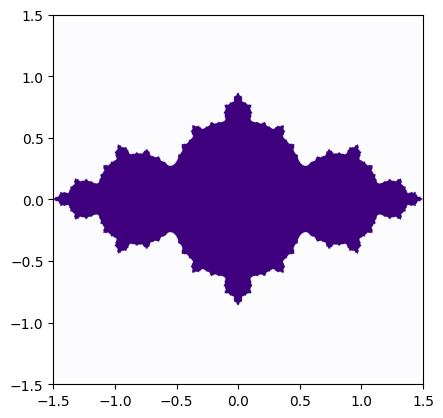

In [3]:
def julia_plot(c):
    N = 2000 # number of x-values to try (and also y-values)
    d = 1.5  # We will try x and y values between -d and +d
    n = 10   # number of iterations to try
    xs = np.linspace(-d, d, N)
    zs = xs.reshape((1,N)) + 1j * xs.reshape((N,1)) # Set up a grid of complex numbers
    for j in range(n):
        zs = zs**2 + c
    in_K = (np.abs(zs) < 2)
    plt.imshow(in_K, extent=[-d,d,-d,d], cmap='Purples')

julia_plot(-0.75)
    


The function above generates overflow warnings.  This is because if $z_0$ does not lie in $K_c$, then $z_k$ will go to infinity quite rapidly, so it will eventually be too large for Python to handle.  We want to modify the function to avoid this issue, but in a way that can be vectorized for efficiency.  The code below effectively replaces $z$ by $10$ as soon as $|z|\geq 2$, and this prevents any overflow.

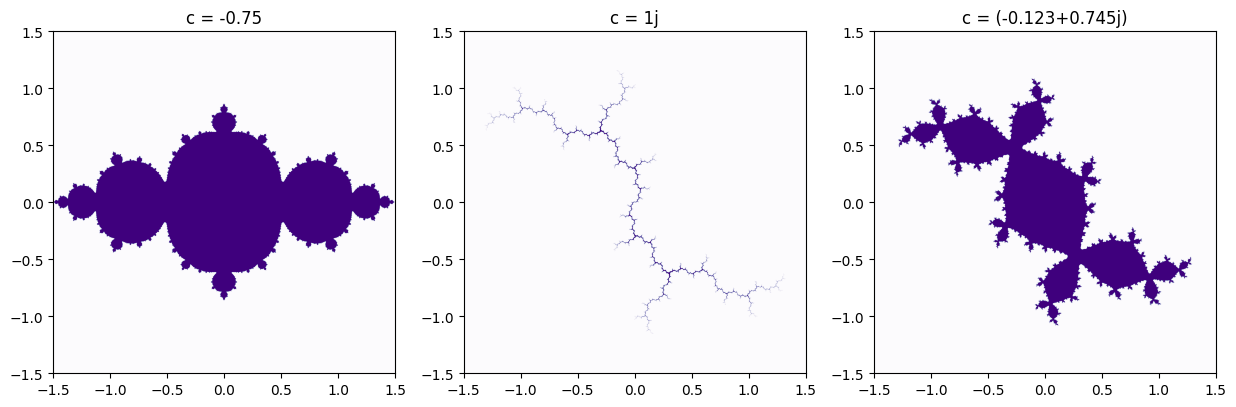

In [10]:
def julia_plot_no_warnings(ax,c,n=20):
    N = 2000 # number of x-values to try (and also y-values)
    d = 1.5  # We will try x and y values between -d and +d
    xs = np.linspace(-d, d, N)
    zs = xs.reshape((1,N)) - 1j * xs.reshape((N,1)) # Set up a grid of complex numbers
    in_K = (np.abs(zs) < 2)
    for j in range(n):
        zs = in_K * (zs**2 + c) + (1 - in_K) * 10
        in_K = (np.abs(zs) < 2)
    ax.imshow(in_K, extent=[-d,d,-d,d], cmap='Purples')
    ax.set_title(f'c = {c}')

fig, ax = plt.subplots(1,3,figsize=(15,5))
cs = [-0.75, 1j, -0.123+0.745*1j]
julia_plot_no_warnings(ax[0],cs[0],20)
julia_plot_no_warnings(ax[1],cs[1],15)
julia_plot_no_warnings(ax[2],cs[2],20)